# **AVALIAÇÃO DO DESEMPENHO OPERACIONAL DE UMA TURBINA EÓLICA**
![](image-T1.webp)

## INTRODUÇÃO
---

Nesta análise, exploramos o desempenho operacional de uma turbina eólica utilizando dados reais de potência ativa gerada em relação à velocidade do vento. O objetivo principal é investigar como a turbina responde em diversas condições de vento, compreender sua eficiência energética e identificar possíveis áreas de aprimoramento em sua operação.

Ao examinar a relação entre a velocidade do vento e a potência ativa gerada pela turbina, buscamos entender se a turbina está operando conforme o esperado, se há desvios significativos entre os dados reais e os valores teóricos previstos e quais fatores podem estar influenciando o desempenho da turbina em determinadas condições de vento.

Essa análise proporcionará insights valiosos para otimizar a performance da turbina, aumentar sua eficiência energética e garantir uma geração de energia mais estável e confiável.

A base de dados utilizada se encontra em: https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset?resource=download

## ANALISANDO OS DADOS

---

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [37]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(kW)','WindSpeed(m/s)', 'CurvaTeórica(KWh)', 'DireçãoVento(°)'] 
del turbina['DireçãoVento(°)']
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'])
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),CurvaTeórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


### Gráfico 1 (Dados Reais):

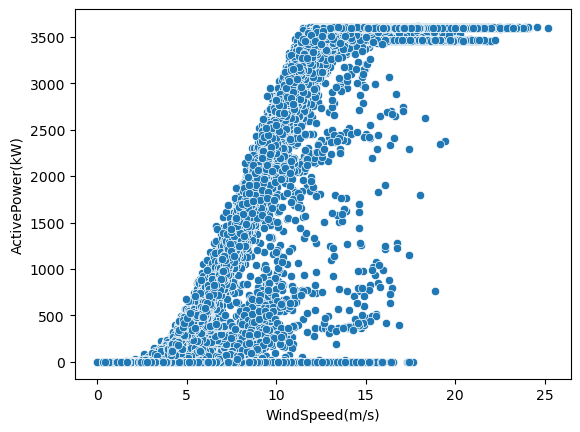

In [17]:
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)');

### Gráfico 2 (Curva Teórica):

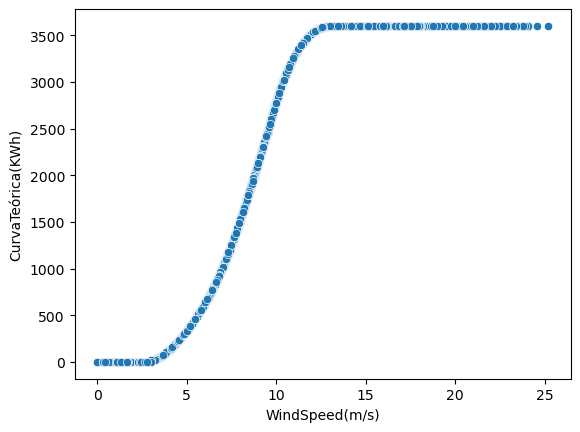

In [18]:
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='CurvaTeórica(KWh)');


### **Gráfico 1 (Dados Reais):**
- Este gráfico de dispersão mostra a relação entre a velocidade do vento (`WindSpeed(m/s)`) e a potência ativa real (`ActivePower(kW)`) gerada pela turbina eólica. bserva-se uma tendência geral de aumento da potência ativa com o aumento da velocidade do vento. No entanto, há alguns pontos que se desviam da tendência esperada. Esses pontos fora do esperado podem indicar períodos de ineficiência na operação da turbina ou possíveis falhas técnicas.

### **Gráfico 2 (Curva Teórica):**
- Este gráfico de dispersão mostra a relação teórica esperada entre a velocidade do vento e a potência ativa (`CurvaTeórica(KWh)`), assumindo condições ideais. A curva teórica representa a potência máxima que a turbina poderia gerar em condições ideais para cada velocidade de vento. Comparando com o gráfico dos dados reais, nota-se que a maioria dos pontos reais se alinham bem com a curva teórica, mas os pontos fora do esperado no gráfico real indicam variações operacionais.

### **Interpretação dos Resultados**
- A comparação entre os dois gráficos revela que, embora a turbina geralmente funcione conforme esperado, há momentos em que a eficiência é menor do que a prevista pela curva teórica. Esses desvios podem ser causados por diversos fatores, como turbulência no vento, manutenção inadequada, falhas técnicas ou outros fatores ambientais que afetam o desempenho da turbina. Identificar e analisar esses pontos fora do esperado pode ajudar a melhorar a eficiência operacional da turbina e minimizar perdas de energia.

A análise dos gráficos de dispersão revela uma relação clara entre a velocidade do vento e a potência ativa gerada pela turbina eólica. No entanto, a presença de pontos fora do esperado nos dados reais indica que há oportunidades para melhorias na operação da turbina.

In [49]:
pot_real = turbina['ActivePower(kW)'].tolist()
pot_teórica = turbina['CurvaTeórica(KWh)'].tolist()
pot_max= []
pot_min= []
dentro_limite = []

for potencia in pot_teórica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('dentro')
    elif potencia == 0:
        dentro_limite.append('zero')
    else:
        dentro_limite.append("fora")
        
print(dentro_limite.count('dentro')/len(dentro_limite))
print(dentro_limite.count('fora')/len(dentro_limite))

0.37286760340391845
0.5579259845636255


In [38]:
 turbina['DentroLimite'] = dentro_limite
    
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),CurvaTeórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,dentro


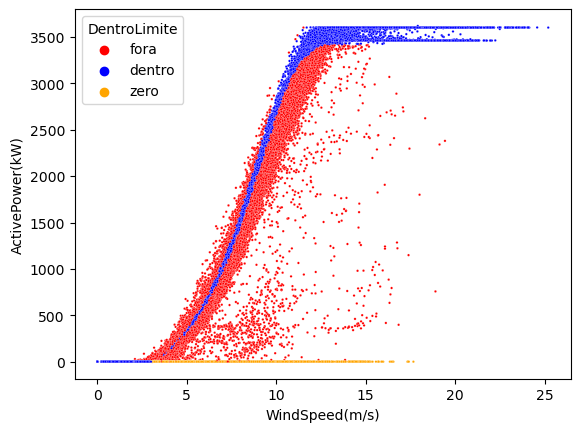

In [44]:
cores = {'dentro':'blue', 'fora':'red', 'zero':'orange'}

sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)', hue='DentroLimite', s=3, palette=cores);

### **Gráfico de Desempenho da Turbina:**

**Este gráfico de dispersão mostra a relação entre a velocidade do vento (`WindSpeed(m/s)`) e a potência ativa real (`ActivePower(kW)`) gerada pela turbina eólica, com os dados classificados em 'dentro', 'fora' e 'zero'.**
- **'dentro' (azul):** Pontos onde a potência ativa real está dentro do limite de 5% da potência teórica.
- **'fora' (vermelho):** Pontos onde a potência ativa real está fora do limite de 5% da potência teórica.
- **'zero' (laranja):** Pontos onde a potência ativa real é zero, indicando períodos em que a turbina não estava gerando energia.

### **Observações:**
- Os pontos fora do limite (vermelho) sugerem períodos de ineficiência ou possíveis falhas técnicas na operação da turbina.
- Os pontos onde a potência ativa é zero (laranja) podem indicar períodos de inatividade ou condições de vento insuficientes para geração de energia.

### **Interpretação dos Resultados:**
- A classificação dos dados em 'dentro', 'fora' e 'zero' fornece uma visualização clara de como a turbina está performando em relação aos valores teóricos esperados.
- Os pontos 'fora' indicam que há ocasiões em que a turbina não está operando conforme o esperado, possivelmente devido a problemas técnicos, manutenção, ou variações nas condições do vento.
- Os pontos 'zero' são importantes para identificar períodos de inatividade ou baixa produção de energia, que podem ser analisados mais detalhadamente para entender suas causas.
- Esta análise detalhada pode ajudar a identificar oportunidades de melhoria na operação da turbina, visando aumentar a eficiência e a confiabilidade da geração de energia.

### **CONCLUSÃO FINAL:**

A análise detalhada do desempenho da turbina eólica, considerando a classificação dos dados em relação aos limites teóricos, oferece uma perspectiva essencial sobre sua operação. Enquanto cerca de 37.29% dos dados estão alinhados com as expectativas ('dentro' dos limites teóricos), uma parcela significativa, aproximadamente 55.79%, está classificada como 'fora'. Essa proporção considerável de dados fora dos limites previstos sugere possíveis áreas de ineficiência ou falhas operacionais.

Portanto, é imperativo que medidas corretivas sejam implementadas para melhorar a eficiência e a confiabilidade da turbina. A análise contínua e a manutenção proativa são essenciais para minimizar os desvios observados, garantindo uma geração de energia mais estável e consistente no longo prazo. A identificação precoce e a resolução de problemas operacionais podem resultar em melhorias significativas no desempenho geral da turbina, contribuindo para a sustentabilidade e a eficácia do sistema de energia eólica.